### problem
A concert, where 4 musician are there for the performance choose wisly
- sofia
- angelina
- lex
- leo

Sofia and angelina tend to not get along on tour and have been known to have creative differences when writing music. Lex and leo are fine together. However sofia and lex broke up after the last time they toured together.

which combination of musicians should be chosen for the tour?

A = Sofia
B = Angelina
C = Lex
D = Leo
```
(A ^ B) ... XOR

(C & D) ... AND

!(A & C) ... NOT

(A ^ B) & (C & D) & !(A & C)
```

we will use grovers' algorithm to find the solution

In [15]:
!pip freeze | grep -E '^qiskit==.*'

qiskit==2.0.0


In [16]:
from qiskit_aer import QasmSimulator
from qiskit.circuit.library import PhaseOracle

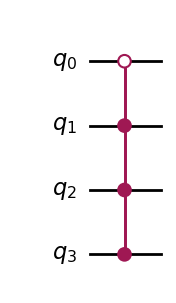

In [17]:
oracle = PhaseOracle(expression='((A ^ B) & (C & D) & ~(A & C))')
oracle.draw('mpl')

## Problem
https://github.com/qiskit-community/qiskit-algorithms/issues/224

In [18]:
from qiskit_algorithms import Grover
grover = Grover(oracle=oracle)
result = grover.run()
print(result)

ImportError: cannot import name 'BaseSampler' from 'qiskit.primitives' (/home/dipankar/Desktop/OPS/quantum/env/lib64/python3.13/site-packages/qiskit/primitives/__init__.py)

In [21]:
from qiskit.visualization import plot_histogram
result = grover.run(QasmSimulator())

print('Top result: ', result['top_measurement']) # will return 1110 (B,C,D) and (A=0)
plot_historgram(result['measurement'])

NameError: name 'grover' is not defined

## So we don't have support for this oracle thing due to internal deps of it broken!